# Correlation between different enrichment

SSIM check

In [1]:
from pytorch_msssim import ms_ssim, ssim
from bin import load_bgi as ld
import scanpy as sc
import squidpy as sq
import matplotlib as mlp
from tqdm import tqdm

In [18]:
%matplotlib inline

In [2]:
adata_3 = ld.load_bin(gem_file="gRNA/B922/C03628E2.gem.cut",
                    bin_size=20,
                    library_id="gRNA")
adata_2 = ld.load_bin(gem_file="gRNA/B926/D03658A5.gem.cut",
                    bin_size=20,
                    library_id="gRNA")
adata_1 = ld.load_bin(gem_file="gRNA/B924/C03628A1.gem.cut",
                    bin_size=20,
                    library_id="gRNA")

In [3]:
sc.pp.calculate_qc_metrics(adata_1,percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_2,percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_3,percent_top=None, log1p=False, inplace=True)

In [4]:
adata_1

AnnData object with n_obs × n_vars = 63416 × 68
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'

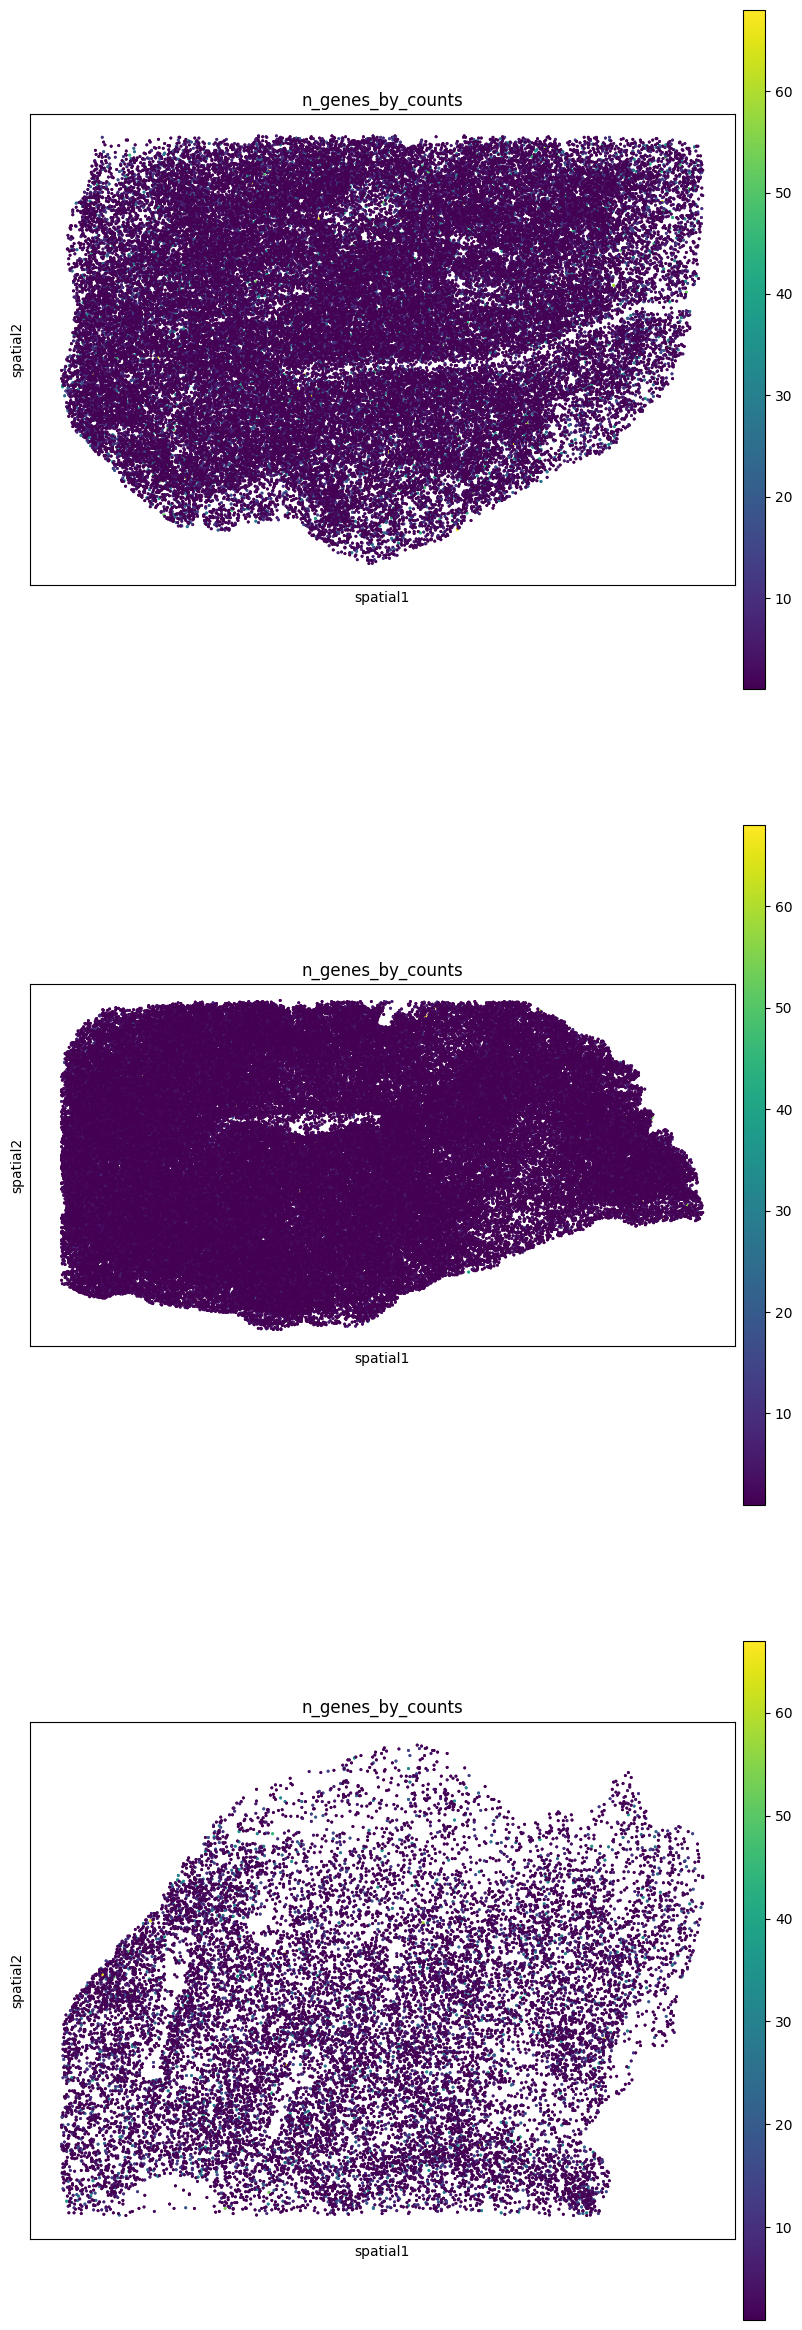

In [10]:
fig, ax = mlp.pyplot.subplots(3, 1, figsize=(10, 30))
sq.pl.spatial_scatter(adata_1, color="n_genes_by_counts", shape=None, size=5, library_id="spatial", ax=ax[0])
sq.pl.spatial_scatter(adata_2, color="n_genes_by_counts", shape=None, size=5, library_id="spatial", ax=ax[1])
sq.pl.spatial_scatter(adata_3, color="n_genes_by_counts", shape=None, size=5, library_id="spatial", ax=ax[2])

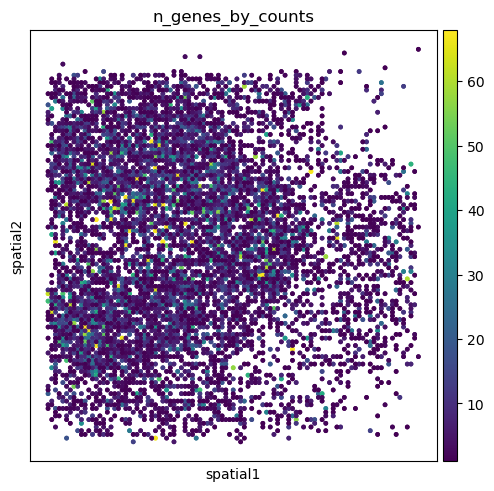

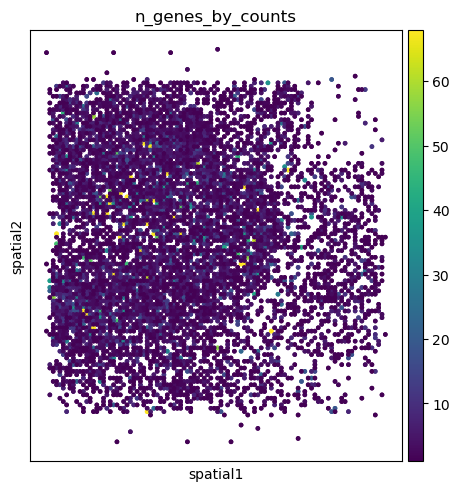

In [20]:
sc.pp.calculate_qc_metrics(adata_1,percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_5,percent_top=None, log1p=False, inplace=True)
sq.pl.spatial_scatter(adata_1,shape=None,color=["n_genes_by_counts",],library_id='gRNA')
sq.pl.spatial_scatter(adata_5,shape=None,color=["n_genes_by_counts",],library_id='gRNA')

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
patch_size = 120

In [31]:
spatial_coords = adata_m.obsm['spatial'] / 200
guide_cnt_matrix_m = np.zeros((patch_size, patch_size, 68))
genes = adata_m.var_names
for idx, gene in tqdm(enumerate(genes)):
    expression = adata_m[:, gene].X.toarray().flatten()
    for i, (x, y) in enumerate(spatial_coords):
        guide_cnt_matrix_m[int(x), int(y), idx] = expression[i]
guide_cnt_matrix_m.shape

68it [00:01, 49.34it/s]


(120, 120, 68)

In [21]:
spatial_coords = adata_1.obsm['spatial'] / 200
guide_cnt_matrix_1 = np.zeros((patch_size, patch_size, 68))
genes = adata_1.var_names
for idx, gene in tqdm(enumerate(genes)):
    expression = adata_1[:, gene].X.toarray().flatten()
    for i, (x, y) in enumerate(spatial_coords):
        guide_cnt_matrix_1[int(x), int(y), idx] = expression[i]
guide_cnt_matrix_1.shape

68it [00:00, 78.52it/s]


(120, 120, 68)

In [22]:
spatial_coords = adata_2.obsm['spatial'] / 200
guide_cnt_matrix_2 = np.zeros((patch_size, patch_size, 68))
genes = adata_2.var_names
for idx, gene in tqdm(enumerate(genes)):
    expression = adata_2[:, gene].X.toarray().flatten()
    for i, (x, y) in enumerate(spatial_coords):
        guide_cnt_matrix_2[int(x), int(y), idx] = expression[i]
guide_cnt_matrix_2.shape

68it [00:00, 96.31it/s]


(120, 120, 68)

In [23]:
spatial_coords = adata_3.obsm['spatial'] / 200
guide_cnt_matrix_3 = np.zeros((patch_size, patch_size, 68))
genes = adata_3.var_names
for idx, gene in tqdm(enumerate(genes)):
    expression = adata_3[:, gene].X.toarray().flatten()
    for i, (x, y) in enumerate(spatial_coords):
        guide_cnt_matrix_3[int(x), int(y), idx] = expression[i]
guide_cnt_matrix_3.shape

68it [00:00, 92.48it/s]


(120, 120, 68)

In [24]:
spatial_coords = adata_4.obsm['spatial'] / 200
guide_cnt_matrix_4 = np.zeros((patch_size, patch_size, 68))
genes = adata_4.var_names
for idx, gene in tqdm(enumerate(genes)):
    expression = adata_4[:, gene].X.toarray().flatten()
    for i, (x, y) in enumerate(spatial_coords):
        guide_cnt_matrix_4[int(x), int(y), idx] = expression[i]
guide_cnt_matrix_4.shape

68it [00:00, 70.51it/s]


(120, 120, 68)

In [25]:
spatial_coords = adata_5.obsm['spatial'] / 200
guide_cnt_matrix_5 = np.zeros((patch_size, patch_size, 68))
genes = adata_5.var_names
for idx, gene in tqdm(enumerate(genes)):
    expression = adata_5[:, gene].X.toarray().flatten()
    for i, (x, y) in enumerate(spatial_coords):
        guide_cnt_matrix_5[int(x), int(y), idx] = expression[i]
guide_cnt_matrix_5.shape

68it [00:00, 74.13it/s]


(120, 120, 68)

In [26]:
adata_5.var_names

Index(['sgAdrb2_1_gene', 'sgAdrb2_2_gene', 'sgAqp3_1_gene', 'sgAqp3_2_gene',
       'sgArntl_1_gene', 'sgArntl_2_gene', 'sgCd44_1_gene', 'sgCd44_2_gene',
       'sgCd52_1_gene', 'sgCd52_2_gene', 'sgCxcl16_1_gene', 'sgCxcl16_2_gene',
       'sgDdit3_1_gene', 'sgDdit3_2_gene', 'sgErgic2_1_gene',
       'sgErgic2_2_gene', 'sgFbxo7_1_gene', 'sgFbxo7_2_gene', 'sgFlot1_1_gene',
       'sgFlot1_2_gene', 'sgGata3_1_gene', 'sgGata3_2_gene', 'sgGlb1l2_1_gene',
       'sgGlb1l2_2_gene', 'sgGpa33_1_gene', 'sgGpa33_2_gene', 'sgIkbip_1_gene',
       'sgIkbip_2_gene', 'sgKcna3_1_gene', 'sgKcna3_2_gene', 'sgKlrd1_1_gene',
       'sgKlrd1_2_gene', 'sgL3mbtl3_1_gene', 'sgL3mbtl3_2_gene',
       'sgMark3_1_gene', 'sgMark3_2_gene', 'sgMcoln1_1_gene',
       'sgMcoln1_2_gene', 'sgNmb_1_gene', 'sgNmb_2_gene', 'sgPiezo1_1_gene',
       'sgPiezo1_2_gene', 'sgPomt1_1_gene', 'sgPomt1_2_gene', 'sgPpia_1_gene',
       'sgPpia_2_gene', 'sgS100a11_1_gene', 'sgS100a11_2_gene',
       'sgScamp4_1_gene', 'sgScamp4_2_g

In [27]:
adata_1.var_names

Index(['sgAdrb2_1_gene', 'sgAdrb2_2_gene', 'sgAqp3_1_gene', 'sgAqp3_2_gene',
       'sgArntl_1_gene', 'sgArntl_2_gene', 'sgCd44_1_gene', 'sgCd44_2_gene',
       'sgCd52_1_gene', 'sgCd52_2_gene', 'sgCxcl16_1_gene', 'sgCxcl16_2_gene',
       'sgDdit3_1_gene', 'sgDdit3_2_gene', 'sgErgic2_1_gene',
       'sgErgic2_2_gene', 'sgFbxo7_1_gene', 'sgFbxo7_2_gene', 'sgFlot1_1_gene',
       'sgFlot1_2_gene', 'sgGata3_1_gene', 'sgGata3_2_gene', 'sgGlb1l2_1_gene',
       'sgGlb1l2_2_gene', 'sgGpa33_1_gene', 'sgGpa33_2_gene', 'sgIkbip_1_gene',
       'sgIkbip_2_gene', 'sgKcna3_1_gene', 'sgKcna3_2_gene', 'sgKlrd1_1_gene',
       'sgKlrd1_2_gene', 'sgL3mbtl3_1_gene', 'sgL3mbtl3_2_gene',
       'sgMark3_1_gene', 'sgMark3_2_gene', 'sgMcoln1_1_gene',
       'sgMcoln1_2_gene', 'sgNmb_1_gene', 'sgNmb_2_gene', 'sgPiezo1_1_gene',
       'sgPiezo1_2_gene', 'sgPomt1_1_gene', 'sgPomt1_2_gene', 'sgPpia_1_gene',
       'sgPpia_2_gene', 'sgS100a11_1_gene', 'sgS100a11_2_gene',
       'sgScamp4_1_gene', 'sgScamp4_2_g

In [13]:
ssim_matrix = np.zeros((5, 5))

x_1 = torch.from_numpy(guide_cnt_matrix_1).unsqueeze(0).permute(0, 3, 1, 2)
x_2 = torch.from_numpy(guide_cnt_matrix_2).unsqueeze(0).permute(0, 3, 1, 2)
x_3 = torch.from_numpy(guide_cnt_matrix_3).unsqueeze(0).permute(0, 3, 1, 2)
x_4 = torch.from_numpy(guide_cnt_matrix_4).unsqueeze(0).permute(0, 3, 1, 2)
x_5 = torch.from_numpy(guide_cnt_matrix_5).unsqueeze(0).permute(0, 3, 1, 2)
max_range = np.max([np.max(guide_cnt_matrix_1), np.max(guide_cnt_matrix_2), np.max(guide_cnt_matrix_3), np.max(guide_cnt_matrix_4), np.max(guide_cnt_matrix_5)])
max_range = 80
ssim_matrix[0, 0] = ssim(x_1, x_1, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[0, 1] = ssim(x_1, x_2, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[0, 2] = ssim(x_1, x_3, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[0, 3] = ssim(x_1, x_4, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[0, 4] = ssim(x_1, x_5, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[1, 1] = ssim(x_2, x_2, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[1, 2] = ssim(x_2, x_3, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[1, 3] = ssim(x_2, x_4, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[1, 4] = ssim(x_2, x_5, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[2, 2] = ssim(x_3, x_3, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[2, 3] = ssim(x_3, x_4, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[2, 4] = ssim(x_3, x_5, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[3, 3] = ssim(x_4, x_4, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[3, 4] = ssim(x_4, x_5, data_range = max_range, size_average=False).numpy()[0]
ssim_matrix[4, 4] = ssim(x_5, x_5, data_range = max_range, size_average=False).numpy()[0]

In [160]:
x_5 = torch.from_numpy(guide_cnt_matrix_5).unsqueeze(0).permute(0, 3, 1, 2)
ssim(x_5, x_5, data_range = max_range, size_average=False).numpy()[0]

93888.0

In [28]:
pearson_matrix = np.zeros((5, 5))

pearson_matrix[0, 0] = pearsonr(guide_cnt_matrix_1.flatten(), guide_cnt_matrix_1.flatten())[0]
pearson_matrix[0, 1] = pearsonr(guide_cnt_matrix_1.flatten(), guide_cnt_matrix_2.flatten())[0]
pearson_matrix[0, 2] = pearsonr(guide_cnt_matrix_1.flatten(), guide_cnt_matrix_3.flatten())[0]
pearson_matrix[0, 3] = pearsonr(guide_cnt_matrix_1.flatten(), guide_cnt_matrix_4.flatten())[0]
pearson_matrix[0, 4] = pearsonr(guide_cnt_matrix_1.flatten(), guide_cnt_matrix_5.flatten())[0]
pearson_matrix[1, 1] = pearsonr(guide_cnt_matrix_2.flatten(), guide_cnt_matrix_2.flatten())[0]
pearson_matrix[1, 2] = pearsonr(guide_cnt_matrix_2.flatten(), guide_cnt_matrix_3.flatten())[0]
pearson_matrix[1, 3] = pearsonr(guide_cnt_matrix_2.flatten(), guide_cnt_matrix_4.flatten())[0]
pearson_matrix[1, 4] = pearsonr(guide_cnt_matrix_2.flatten(), guide_cnt_matrix_5.flatten())[0]
pearson_matrix[2, 2] = pearsonr(guide_cnt_matrix_3.flatten(), guide_cnt_matrix_3.flatten())[0]
pearson_matrix[2, 3] = pearsonr(guide_cnt_matrix_3.flatten(), guide_cnt_matrix_4.flatten())[0]
pearson_matrix[2, 4] = pearsonr(guide_cnt_matrix_3.flatten(), guide_cnt_matrix_5.flatten())[0]
pearson_matrix[3, 3] = pearsonr(guide_cnt_matrix_4.flatten(), guide_cnt_matrix_4.flatten())[0]
pearson_matrix[3, 4] = pearsonr(guide_cnt_matrix_4.flatten(), guide_cnt_matrix_5.flatten())[0]
pearson_matrix[4, 4] = pearsonr(guide_cnt_matrix_5.flatten(), guide_cnt_matrix_5.flatten())[0]

In [29]:
pearson_matrix

array([[1.        , 0.01870366, 0.02130361, 0.02542385, 0.02868838],
       [0.        , 1.        , 0.01246886, 0.01377677, 0.01407018],
       [0.        , 0.        , 1.        , 0.01326304, 0.02277787],
       [0.        , 0.        , 0.        , 1.        , 0.02490582],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

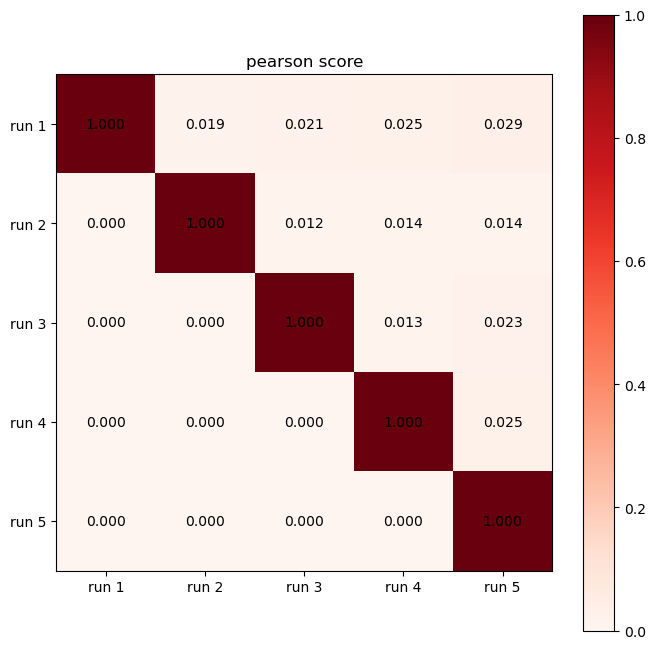

In [15]:
matrix = pearson_matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(matrix, cmap="Reds", interpolation="nearest")
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(matrix.shape[1]))
ax.set_yticks(np.arange(matrix.shape[0]))
ax.set_yticklabels(["run 1", "run 2", "run 3", "run 4", "run 5"])
ax.set_xticklabels(["run 1", "run 2", "run 3", "run 4", "run 5"])
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[0]):
        ax.text(j, i, '%.3f'%matrix[i, j], ha="center", va="center", color="black")
ax.set_title("pearson score")
plt.show()

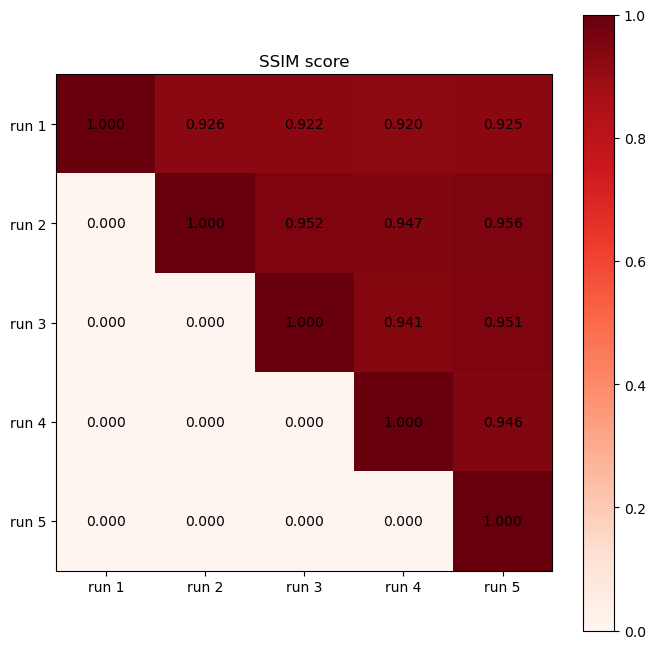

In [16]:
matrix = ssim_matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(matrix, cmap="Reds", interpolation="nearest")
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(matrix.shape[1]))
ax.set_yticks(np.arange(matrix.shape[0]))
ax.set_yticklabels(["run 1", "run 2", "run 3", "run 4", "run 5"])
ax.set_xticklabels(["run 1", "run 2", "run 3", "run 4", "run 5"])
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[0]):
        ax.text(j, i, '%.3f'%matrix[i, j], ha="center", va="center", color="black")
ax.set_title("SSIM score")
plt.show()

0.9775165372149353

In [ ]:
x = torch.from_numpy(adata_1.X.toarray()).unsqueeze(0).unsqueeze(0).permute(0, 3, 1, 2)
y = torch.from_numpy(adata_2.X.toarray()).unsqueeze(0).unsqueeze(0).permute(0, 3, 1, 2)

In [36]:
ms_ssim(x, y, data_range = max_range, size_average=False)

ValueError: Input images should have the same dimensions, but got torch.Size([1, 68, 1, 5785]) and torch.Size([1, 68, 1, 4450]).

In [52]:


ms_ssim_dict = {}
ssim_dict = {}

genes = adata_1.var_names
for gene in genes:
    x = torch.from_numpy(np.array(Image.open(f"figures/data_1/ssim/{gene}.re.png"))).float().unsqueeze(0).permute(0, 3, 1, 2)
    y = torch.from_numpy(np.array(Image.open(f"figures/data_2/ssim/{gene}.re.png"))).float().unsqueeze(0).permute(0, 3, 1, 2)
    ms_ssim_val = ms_ssim(x, y, data_range=255, size_average=False)
    ssim_val = ssim(x, y, data_range=255, size_average=False)

    ms_ssim_dict[gene] = ms_ssim_val[0].item()
    ssim_dict[gene] = ssim_val[0].item()

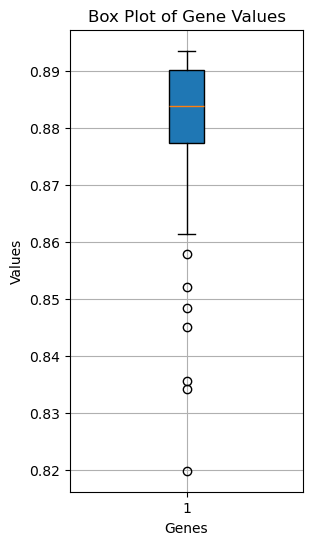

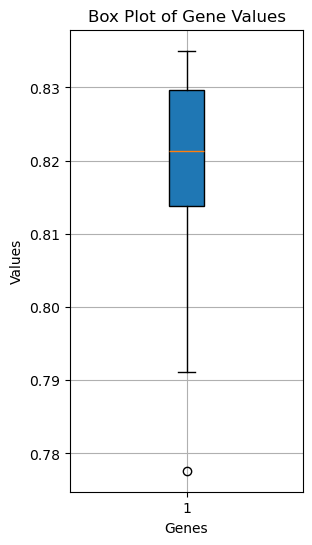

In [53]:
genes = list(ms_ssim_dict.keys())
values = list(ms_ssim_dict.values())

# 绘制箱线图
plt.figure(figsize=(3, 6))
plt.boxplot(values, patch_artist=True)
plt.title('Box Plot of Gene Values')
plt.xlabel('Genes')
plt.ylabel('Values')
plt.grid(True)
plt.show()

genes = list(ssim_dict.keys())
values = list(ssim_dict.values())

# 绘制箱线图
plt.figure(figsize=(3, 6))
plt.boxplot(values, patch_artist=True)
plt.title('Box Plot of Gene Values')
plt.xlabel('Genes')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [85]:
import anndata

In [96]:
adata_1.obs

,n_genes_by_counts,total_counts
367187,1,1
162995,15,17
565036,13,16
91054,13,15
393643,1,1
...,...,...
359631,1,1
281355,1,2
431591,1,1
132193,1,1


In [7]:
adata = adata_1.concatenate(adata_2)
adata

AnnData object with n_obs × n_vars = 16366 × 68
    obs: 'batch'
    obsm: 'spatial'

In [8]:
edge = np.argmax(adata.obsm['spatial'])
edge

27561

In [9]:
from scipy.stats import pearsonr

In [13]:
r_matrix = np.corrcoef(adata_1.X.toarray(), adata_2.X.toarray())

In [39]:
r_matrix[10000][0]

-0.026246206877004824

In [42]:
matrix_1 = np.zeros((edge, edge))
matrix_2 = np.zeros((edge, edge))
for idx, loc in enumerate(adata_1.obsm['spatial']):
    matrix_1[loc[0]][loc[1]] = adata_1.X[idx, 0]
for idx, loc in enumerate(adata_2.obsm['spatial']):
    matrix_2[loc[0]][loc[1]] = adata_2.X[idx, 0]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
cnt = 0
for x in adata_1.obsm['spatial']:


SyntaxError: incomplete input (236137988.py, line 2)

In [20]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [54]:
pos_1 = [tuple([array[0], array[1]]) for array in adata_1.obsm['spatial']]
pos_2 = [tuple([array[0], array[1]]) for array in adata_2.obsm['spatial']]

union = len(pos_1) + len(pos_2) - len(set(pos_1).union(set(pos_2)))
print(union)


3330


In [55]:

r_dict = {}
for gene in tqdm(adata_1.var_names):
    value_dict = {}
    for idx, pos in enumerate(pos_1):
        value_dict[pos] = [0, 0]
        value_dict[pos][0] = adata_1[idx, gene].X.toarray()[0][0]

    for idx, pos in enumerate(pos_2):
        if pos in pos_1:
            #print(pos)
            value_dict[pos][1] = adata_2[idx, gene].X.toarray()[0][0]
        else:
            value_dict[pos] = [0, 0]
            value_dict[pos][1] = adata_2[idx, gene].X.toarray()[0][0]

    union_1 = [value[0] for keys, value in value_dict.items()]
    union_2 = [value[1] for keys, value in value_dict.items()]

    r, _ = pearsonr(union_1, union_2)
    r_dict[gene] = r

100%|██████████| 68/68 [02:48<00:00,  2.47s/it]


In [114]:
pos_1 = adata_1.obsm['spatial']
pos_2 = adata_2.obsm['spatial']

for gene in tqdm(adata_1.var_names):
    value_dict = {}
    for idx, pos in enumerate(pos_1):
        value_dict[tuple(pos)] = [0, 0]
        value_dict[tuple(pos)][0] = adata_1[idx, gene].X.toarray()[0][0]

    for idx, pos in enumerate(pos_2):
        if tuple(pos) in value_dict:
            value_dict[tuple(pos)][1] = adata_2[idx, gene].X.toarray()[0][0]
        else:
            value_dict[tuple(pos)] = [0, 0]
            value_dict[tuple(pos)][1] = adata_2[idx, gene].X.toarray()[0][0]

    union_1 = [[keys[0], keys[1], value[0]] for keys, value in value_dict.items()]
    union_2 = [[keys[0], keys[1], value[1]] for keys, value in value_dict.items()]

    r_= np.corrcoef(union_1, union_2)
    print(r_)
    break

  0%|          | 0/68 [00:13<?, ?it/s]

[[ 1.          0.99347376  0.96933751 ... -0.10711505  0.10596781
   0.25598087]
 [ 0.99347376  1.          0.99103993 ...  0.00698868  0.21869493
   0.36457088]
 [ 0.96933751  0.99103993  1.         ...  0.14048874  0.34706816
   0.48567765]
 ...
 [-0.10711505  0.00698868  0.14048874 ...  1.          0.97729784
   0.93370077]
 [ 0.10596781  0.21869493  0.34706816 ...  0.97729784  1.
   0.98836474]
 [ 0.25598087  0.36457088  0.48567765 ...  0.93370077  0.98836474
   1.        ]]


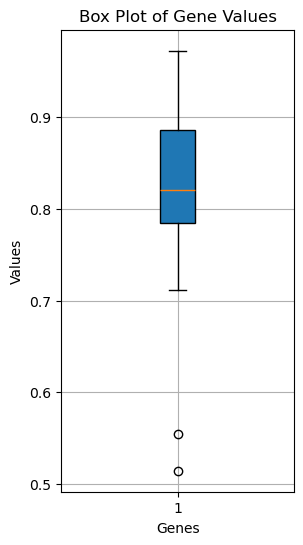

In [56]:
genes = list(r_dict.keys())
values = list(r_dict.values())

# 绘制箱线图
plt.figure(figsize=(3, 6))
plt.boxplot(values, patch_artist=True)
plt.title('Box Plot of Gene Values')
plt.xlabel('Genes')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [24]:
len(adata_1.X.toarray())

9550

In [3]:
# turn to matrix
for i in tqdm(range(len(adata_1.var_names))):
    matrix_1 = np.zeros((30000, 30000))
    cnt = 0
    for x, y in adata_1.obsm['spatial']:
        matrix_1[x][y] = adata_1.X.toarray()[cnt][i]
        cnt += 1
    matrix_2 = np.zeros((30000, 30000))
    cnt = 0
    for x, y in adata_2.obsm['spatial']:
        matrix_2[x][y] = adata_2.X.toarray()[cnt][i]
        cnt += 1
    x = torch.from_numpy(matrix_1).float().unsqueeze(0).unsqueeze(0).permute(0, 1, 2, 3)
    y = torch.from_numpy(matrix_2).float().unsqueeze(0).unsqueeze(0).permute(0, 1, 2, 3)
    ms_ssim_val = ms_ssim(x, y, data_range=1, size_average=False)
    print(ms_ssim_val)
    break

NameError: name 'tqdm' is not defined

In [12]:
genes = adata_1.var_names
pearson_r_dict = {}
for i in tqdm(range(len(genes))):
    r_matrix = np.corrcoef(adata_1.X[:,i].toarray(), adata_2.X[:,i].toarray())
    r = np.mean(r_matrix)
    gene = adata_1.var_names[i]
    pearson_r_dict[gene] = r
    break

  0%|          | 0/68 [00:00<?, ?it/s]/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
  0%|          | 0/68 [00:06<?, ?it/s]


In [ ]:
genes = list(pearson_r_dict.keys())
values = list(pearson_r_dict.values())

# 绘制箱线图
plt.figure(figsize=(3, 6))
plt.boxplot(values, patch_artist=True)
plt.title('Box Plot of Gene Values')
plt.xlabel('Genes')
plt.ylabel('Values')
plt.grid(True)
plt.show()